# 🥱 LangGraph_協作者模式_翻譯篇

❤️ Created by [hengshiousheu](https://huggingface.co/Heng666).

## Map-recude 是種常見的高效任務拆解操作。這種方法通常將任務拆解成較小的子任務，待子任務都完成後，整合所有子任務成果。主要分成兩步驟：Map 和 Reduce:
- MAP 步驟：將任務分成子任務，並分配給多台機器運算。
- Reduce 步驟：收及所有子任務，並將結果彙整計算，得出最終成果。

## 應用場景
Map-Reduce 不只用在電腦運算領用，其思想主要源自於日常生活，以下是一些具體的例子：
1. 家庭大掃除
 - Map: 家庭成員分工,每人負責清理家中的一個區域（如客廳、臥室、廚房等）。
 - Reduce: 家長檢查每個區域的清潔情況,整理出需要特別處理的地方（如需要維修的物品）,確保整個房子的清潔完成。
2. 餐廳處理訂單
 - Map: 將客人的點餐訂單分配給不同的廚師,每個廚師負責準備自己專門的菜品。
 - Reduce: 服務員收集所有準備好的菜品,確保每桌客人的訂單完整,然後送到相應的餐桌。
3. 超市銷售數據分析
 - Map: 將每個分店的銷售數據分配給不同的分析員,每個分析員負責計算自己負責店鋪的銷售總額和熱銷商品。
 - Reduce: 匯總所有分析員的結果,得出整個連鎖超市的銷售報告和熱銷商品排行。

# 環境建置

## 安裝套件包

在本演練中，

我們將使用以下套件：

In [ ]:
%pip install --upgrade --quiet langchain
%pip install --upgrade --quiet langchain-openai
%pip install --upgrade --quiet langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 256.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.9/393.9 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.9/148.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 180.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.

我們需要設置 環境變數 OPENAI_API_KEY ，可以直接完成，如下所示：

In [ ]:
import os
import getpass
from google.colab import userdata

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

### (可用可不用)LangSmith

你用LangChain構建的許多應用程式將包含多個步驟，並多次調用LLM調用。隨著這些應用程式變得越來越複雜，能夠檢查您的鏈或代理內部到底發生了什麼變得至關重要。最好的方法是與[LangSmith](https://smith.langchain.com)合作。

請注意，LangSmith 不是必需的，但它很有説明。如果您確實想使用 LangSmith，請在上面的鏈接中註冊后，請確保設置環境變數以開始記錄跟蹤：

In [ ]:
import os
import getpass
from datetime import datetime
import pytz

current_time = datetime.now(pytz.timezone('Asia/Taipei')).strftime("%Y-%m-%d %Z")

os.environ["LANGCHAIN_TRACING_V2"] = "false" ##想要使用記得改 true, 不要時改 false.
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"] = f"LangGraph MapReduce-ToT-{current_time}"
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')

# 情境練習題 翻譯

**利用思維樹 (Tree of Thought) 方法的翻譯流程**

接下來要介紹的程式碼是使用 LangGraph 來實現 Map-Reduce 模式，自動化英文到繁體中文翻譯的生成、評估、分析過程。我們將解釋主要部分，包括如何使用 Send 函數：

* 整體流程：
   * 生成多個翻譯版本
   * 評估每個翻譯版本
   * 對每個評估進行深入分析
   * 最終排名

* StateGraph 的使用：程式碼使用 StateGraph 來定義工作流程。這允許我們管理不同步驟之間的數據流動。

* Send 的使用：Send 在實現 Map-Reduce 模式中扮演著重要角色。

   a. `continue_to_evaluation` 函數：
      - 這個函數將生成的多個翻譯版本分別發送到評估階段。
      - 它為每個翻譯創建一個新的任務，確保每個翻譯都被獨立評估。

   b. `continue_to_deep_analysis` 函數：
      - 類似地，這個函數將每個評估結果發送到深入分析階段。
      - 它確保每個翻譯的評估都能得到詳細的文化和語言分析。

* 節點函數：
   - `generate_translations`：生成多個可能的翻譯版本。
   - `evaluate_translation`：評估單個翻譯的質量。
   - `deep_analyze`：深入分析翻譯的文化適應性和語言細節。
   - `rank_translations`：根據前面的分析對所有翻譯進行最終排名。

這種結構允許我們parallel處理多個翻譯版本，充分利用 LLM 的能力來生成多樣化的翻譯選項，並通過多步驟的評估和分析來選出最佳翻譯。這種方法不僅提高了翻譯的質量，還能為翻譯決策提供深入的見解和理由。

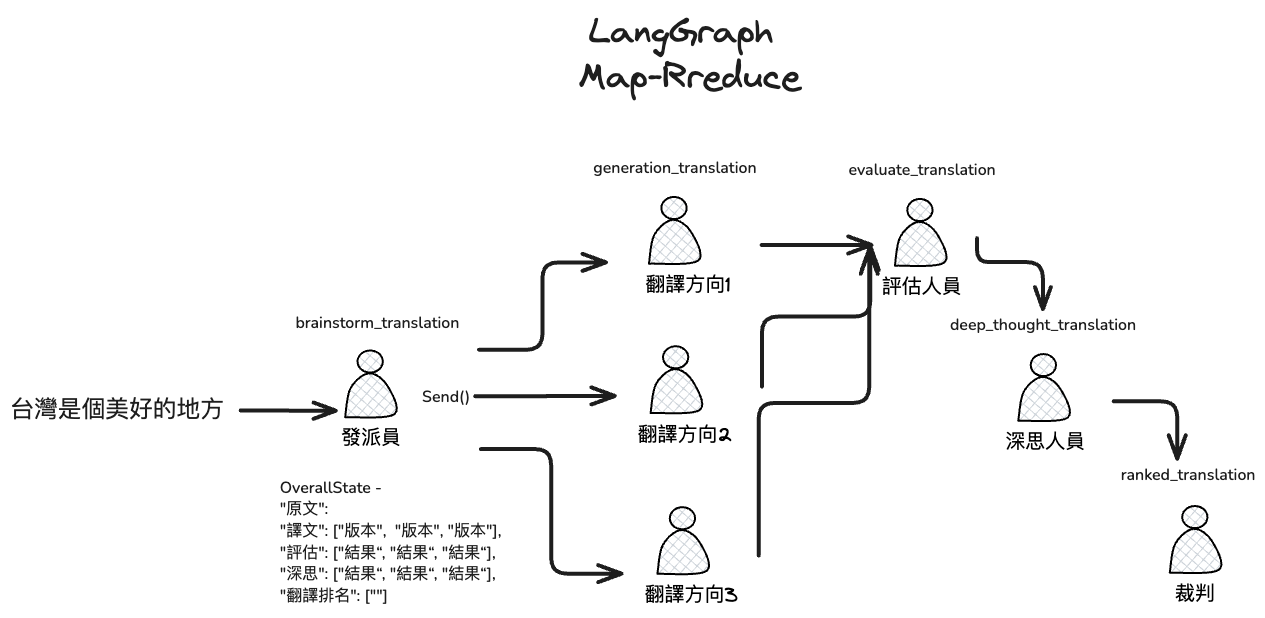

## 階段ㄧ、繪製草稿版本

### 導入環境

In [ ]:
import operator
from typing import Annotated, TypedDict
from langchain_core.pydantic_v1 import BaseModel
from langgraph.constants import Send
from langgraph.graph import END, StateGraph, START
from langchain_openai import ChatOpenAI

### 建立節點名稱



In [ ]:
# 定義節點名稱常量
# 這些常量用於在圖中標識不同的處理步驟
GENERATE_TRANSLATIONS = "GENERATE_TRANSLATIONS"
EVALUATE_TRANSLATION = "EVALUATE_TRANSLATION"
DEEP_ANALYZE = "DEEP_ANALYZE"
RANK_TRANSLATIONS = "RANK_TRANSLATIONS"

## 階段二、逐一建立 Agent

## 定義整體狀態


```
OverallState -
"原文":
"譯文": ["版本",  "版本", "版本"],
"評估": ["結果“, "結果“, "結果“],
"深思": ["結果“, "結果“, "結果“],
"翻譯排名": [""]
```

In [ ]:
# 這個類用於跟踪整個翻譯過程中的所有相關數據
class OverallState(TypedDict):
    input: str
    translations: Annotated[list[str], operator.add]
    reviews: Annotated[list[str], operator.add]
    deep_analyses: Annotated[list[str], operator.add]
    ranked_translations: str

# 定義單個翻譯處理的狀態
class TranslationState(TypedDict):
    translation: str

### 頭腦風暴者

In [ ]:
class Translations(BaseModel):
    translations: list[str]

model = ChatOpenAI(model="gpt-3.5-turbo-0125")

step1_prompt = """Step 1: Given the original English sentence: "{input}", please brainstorm three distinct translation options in Traditional Chinese. Consider factors such as accuracy, fluency, cultural appropriateness, and idiomatic expression."""

def generate_translations(state: OverallState):
    """生成翻譯選項"""
    prompt = step1_prompt.format(input=state["input"])
    response = model.with_structured_output(Translations).invoke(prompt)
    return {"translations": response.translations}

### 評估人員

In [ ]:
class Review(BaseModel):
    review: str

model = ChatOpenAI(model="gpt-3.5-turbo-0125")

step2_prompt = """Step 2: For each of the three proposed translations, evaluate their quality. Consider their accuracy, fluency, cultural appropriateness, and overall effectiveness. Assign a score out of 10 for each aspect.

Translations:
{translations}"""

def evaluate_translation(state: TranslationState):
    """評估單個翻譯"""
    prompt = step2_prompt.format(translations=state["translation"])
    response = model.with_structured_output(Review).invoke(prompt)
    return {"reviews": [response.review]}

### 深思人員

In [ ]:
class DeepAnalysis(BaseModel):
    deep_analysis: str

step3_prompt = """Step 3: For each translation, provide a deeper analysis. Consider how well it captures the original meaning, its suitability for the target audience, and any cultural nuances. Suggest potential improvements or alternative phrasings.

Evaluation:
{review}"""

def deep_analyze(state: TranslationState):
    """深入分析單個翻譯"""
    prompt = step3_prompt.format(review=state["translation"])
    response = model.with_structured_output(DeepAnalysis).invoke(prompt)
    return {"deep_analyses": [response.deep_analysis]}

### 排名人員

In [ ]:
class RankedTranslations(BaseModel):
    ranked_translations: str

step4_prompt = """Step 4: Based on the evaluations and analyses, rank the translations in order of overall quality. Provide a justification for each ranking and offer any final thoughts or considerations for improving the best translation. Please Display Result in Traditional Chinese

Detailed analysis:
{deep_analysis}"""

def rank_translations(state: OverallState):
    """對所有翻譯進行排名"""
    deep_analyses = "\n\n".join(state["deep_analyses"])
    prompt = step4_prompt.format(deep_analysis=deep_analyses)
    response = model.with_structured_output(RankedTranslations).invoke(prompt)
    return {"ranked_translations": response.ranked_translations}

## 定義條件邊

In [ ]:
# 這些函數定義了如何在不同節點之間傳遞數據

def continue_to_evaluation(state: OverallState):
    """將生成的翻譯發送到評估階段"""
    return [Send(EVALUATE_TRANSLATION, {"translation": t}) for t in state["translations"]]

def continue_to_deep_analysis(state: OverallState):
    """將評估結果發送到深入分析階段"""
    return [Send(DEEP_ANALYZE, {"translation": r}) for r in state["reviews"]]

### 構建圖

In [ ]:
# 使用 StateGraph 創建工作流程圖
graph = StateGraph(OverallState)

# 添加節點
graph.add_node(GENERATE_TRANSLATIONS, generate_translations)
graph.add_node(EVALUATE_TRANSLATION, evaluate_translation)
graph.add_node(DEEP_ANALYZE, deep_analyze)
graph.add_node(RANK_TRANSLATIONS, rank_translations)

# 定義節點之間的連接
graph.add_edge(START, GENERATE_TRANSLATIONS)
graph.add_conditional_edges(GENERATE_TRANSLATIONS, continue_to_evaluation, [EVALUATE_TRANSLATION])
graph.add_conditional_edges(EVALUATE_TRANSLATION, continue_to_deep_analysis, [DEEP_ANALYZE])
graph.add_edge(DEEP_ANALYZE, RANK_TRANSLATIONS)
graph.add_edge(RANK_TRANSLATIONS, END)

# 編譯圖
app = graph.compile()

### 可視覺化當前圖結構

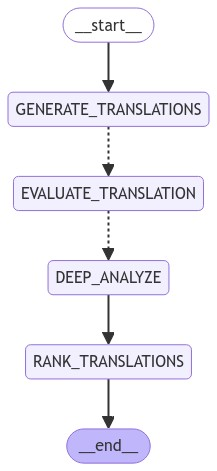

In [ ]:
from IPython.display import Image

Image(app.get_graph().draw_mermaid_png())

### 與圖互動

In [ ]:
import rich
# 調用圖並處理結果
for s in app.stream({
    "input": "The early bird catches the worm.",
}):
    rich.print(s)

{'GENERATE_TRANSLATIONS': {'translations': ['早起的鳥兒有蟲吃。', '捷足先登。', '晨起者得蟲。']}}

{'EVALUATE_TRANSLATION': {'reviews': ['Translation 1: Quick feet first climb.']}}

{'EVALUATE_TRANSLATION': {'reviews': ['Translation 1: The early bird catches the worm.']}}

{'EVALUATE_TRANSLATION': {'reviews': ['Translation 1: Early bird catches the worm.']}}

{'DEEP_ANALYZE': {'deep_analyses': ['Quick feet first climb.']}}

{'DEEP_ANALYZE': {'deep_analyses': ['The early bird catches the worm.']}}

{'DEEP_ANALYZE': {'deep_analyses': ['Translation 1: Early bird catches the worm.']}}

{'RANK_TRANSLATIONS': {'ranked_translations': '1. 早起的鳥兒有蟲吃。'}}

參考資料：https://note.com/astropomeai/n/ndcedaf46db35